# STINTSY MCO - Pumpkin Seeds Dataset
**STINTSY S12** - BANTOLINO, Jana Marie S., DIMALANTA, Jason Erwin Clyde V., JAWALI, Armina R., REJANO, Hans Martin F.

# Section 1: Introduction

In the agricultural industry, the ability to classify pumpkin seeds by type is essential for efficient seed sorting, quality control, and market distribution. Accurate seed type identification allows farmers and distributors to ensure that the seeds meet specific requirements for growth, yield, and commercial viability.

In this project, we aim to develop a machine learning model to classify pumpkin seeds into two primary types: Cercevelik and Urgup Sivrisi. Using a dataset that includes various morphological features of the seeds—such as area, perimeter, axis lengths, compactness, and eccentricity—we will explore, preprocess, and analyze the data to build a robust classification model. This model should be able to accurately predict the type of a pumpkin seed based on its physical characteristics, providing a valuable tool for farmers and agricultural businesses to streamline the sorting and distribution process.

# Section 2: Description of the dataset

The Pumpkin Seeds Dataset provides detailed morphological and nutritional data on two Turkish pumpkin seed varieties, Urgup Sivrisi and Cercevelik (Topak), both belonging to the Cucurbitaceae family. Derived from Cucurbita pepo L and occasionally Cucurbita moschata Duchesne, these seeds are nutritionally valuable, containing ~37% carbohydrates, 35–40% fats and proteins, and essential minerals like calcium, magnesium, and zinc. 

The dataset includes features such as geometric properties (area, perimeter, major and minor axis lengths), shape descriptors (eccentricity, roundness, aspect ratio, compactness), and a classification label identifying the seed type. More information about the different features can be found on the table below.

| Attribute             | Description                                                                                           | Data Type |
|-----------------------|-------------------------------------------------------------------------------------------------------|-----------|
| **Area**              | Number of pixels within the borders of a pumpkin seed                                                 | int64     |
| **Perimeter**         | Circumference in pixels of a pumpkin seed                                                             | float64   |
| **Major_Axis_Length** | Large axis distance of a pumpkin seed                                                                 | float64   |
| **Minor_Axis_Length** | Small axis distance of a pumpkin seed                                                                 | float64   |
| **Convex_Area**       | Number of pixels of the smallest convex shell at the region formed by the pumpkin seed                | int64     |
| **Equiv_Diameter**    | Computed as $\sqrt{\frac{4a}{\pi}}$, where $a$ is the area of the pumpkin seed                                 | float64   |
| **Eccentricity**      | Eccentricity of a pumpkin seed                                                                        | float64   |
| **Solidity**          | Convex condition of the pumpkin seeds                                                                 | float64   |
| **Extent**            | Ratio of a pumpkin seed area to the bounding box pixels                                               | float64   |
| **Roundness**         | Ovality of pumpkin seeds without considering the distortion of the edges                              | float64   |
| **Aspect_Ratio**      | Aspect ratio of the pumpkin seeds                                                                     | float64   |
| **Compactness**       | Proportion of the area of the pumpkin seed relative to the area of the circle with the same circumference | float64 |
| **Class**             | Seed type, either Cercevelik or Urgup Sivrisi                                                         | object    |


# Section 3: List of dependencies

In [25]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import pointbiserialr
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


# Section 4: Data preprocessing and cleaning

In [26]:
# load the data
data = pd.read_csv('dataset/pumpkin_seeds.csv', encoding='latin1')
data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,erevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,erevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,erevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,erevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,erevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,rgp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,rgp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,rgp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,rgp Sivrisi


Based on the output above, the dataset contains 13 columns, 12 of which are the features and the last column being the target label or class of the pumpkin seed. It also contains 2500 rows or data instances of pumpkin seed.

### Removal of Special Characters on the Class column

In [27]:
print(data['Class'].unique())

['\x82er\x8develik' '\x86rg\x9fp Sivrisi']


Since the data have shown that the class column contains special characters for each of its unique values, there is a need to remove this to make sure that it contains the correct value.

In [28]:
data['Class'] = data['Class'].replace({'\x82er\x8develik': 'Cercevelik'})
data['Class'] = data['Class'].replace({'\x86rg\x9fp Sivrisi': 'Urgup Sivrisi'})

print(data['Class'].unique())

['Cercevelik' 'Urgup Sivrisi']


### Checking for NaN / Missing Values

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


Since each row of the dataset does not have any null values, there is no need to handle any NaN / missing values.

### Class Label Encoding

Upon looking at the unique values of the class label, the values are all characters and since the main task of this project is to perform classification of the pumpkin seeds, it is better if the values are converted to numerical representations through Label Encoding. Label Encoding is an approach used for binary classification where there are only two possible classes and it just assigns a value of 0 or 1 to either of the classes. This approach will reduce the complexity of representing labels since only 0 or 1 labels are used for training the machine learning models.

In [30]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the Class column, and assign it back to the same column
data['Class'] = label_encoder.fit_transform(data['Class'])
data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,1
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,1
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,1
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,1


In [31]:
# Check the mapping of classes to their numerical labels
label_mapping = dict(
    zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(label_mapping)

{'Cercevelik': 0, 'Urgup Sivrisi': 1}


Label "0" has been assigned to Cervevelik, whilst label "1" has been assigned to Urgup Sivirsi

## Removing Duplicates


In [32]:
duplicates = data.duplicated()
num_duplicates = duplicates.sum()
num_duplicates

0

Since there are no duplicates present in the dataset, there is no need to handle duplicate values

# Section 5: Exploratory Data Analysis

## 5a. Statistical Summary

The goal of this stage is to figure out the descriptive statistics of the dataset by (a) computing the mean, median, standard deviation, minimum, and maximum for all numerical columns and (b) identifying outliers in features using interquartile range (IQR). This can be done using panda's describe() method.

### Descriptive Statistics of Each Feature

In [33]:
data.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.0000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121,0.4800
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067,0.4997
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800,0.0000
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475,0.0000
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700,0.0000
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500,1.0000
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900,1.0000


### Size / Area 

The mean area of the seeds is approximately 80,658 pixels, with a standard deviation of 13,664 pixels. This indicates a moderate variation in the sizes of the seeds. Most seeds are relatively similar in size, but there are outliers with areas as small as 47,939 pixels and as large as 136,574 pixels.

The significant ranges for features like `Perimeter`, `Major_Axis_Length`, and `Equiv_Diameter` (with coefficients of variation indicating moderate spread) suggest the presence of some outlier seeds that deviate notably from the typical size and shape.

### Shape Characteristics

<b> Eccentricity </b> <br>
The mean eccentricity is 0.8609, with a standard deviation of 0.0452, indicating that most seeds deviate moderately from a perfect circle. A minimum value of 0.4921 and a maximum of 0.9481 suggest variation in how elongated the seeds are.

<b> Roundness </b> <br>
With a mean of 0.7915 and an IQR of 0.0824, most seeds are relatively round but not perfectly circular. The minimum roundness value of 0.5546 highlights that some seeds are quite elongated.

<b> Aspect Ratio </b> <br>
The mean value of 2.0417 shows that most seeds are at least twice as long as their width, further supporting elongation in shape for some types.


Therefore, based on the variation in these shape descriptors, it is likely that these features will be significant in distinguishing between the two classes, Class 0 (Cercevelik) and Class 1 (Urgup Sivrisi). For example, __Cercevelik__ may have higher Roundness and lower Eccentricity values (more circular) while __Urgup Sivrisi__ may exhibit higher Aspect_Ration and Eccentricity values (longer and thinner).

### Compactness and Solidity

<b> Compactness </b> <br>
The mean compactness is 0.7041, with a range from 0.5608 to 0.9049. This suggests variability in how closely the seeds approximate the area of a perfect circle with the same perimeter.

<b> Solidity </b> <br>
With a mean solidity of 0.9895 and a very small standard deviation (0.0035), most seeds are nearly convex, showing minimal indentations or irregularities.


Therefore, along with size and shape, compactness may help in effectively classifying the seeds into their respective types. However, further statistical tests is needed to assess the separability of these features.

### Descriptive Statistics of Each Feature per Class

In [34]:
class0 = data[data['Class'] == 0]

class0.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.0
mean,78423.154615,1089.522488,426.272615,234.776929,79286.488462,315.193332,0.830538,0.989080,0.707018,0.827499,1.822609,0.741163,0.0
std,11246.499728,83.128407,37.196923,19.500795,11350.508104,22.472502,0.036333,0.003391,0.040698,0.037485,0.168501,0.034388,0.0
min,55811.000000,888.242000,320.844600,185.844000,56394.000000,266.572300,0.492100,0.954200,0.507100,0.615300,1.148700,0.588400,0.0
25%,69777.750000,1027.614000,399.972475,219.773150,70522.000000,298.066750,0.810775,0.987900,0.680550,0.803400,1.708325,0.717600,0.0
50%,76718.500000,1083.189500,425.426550,232.093600,77525.500000,312.539650,0.835400,0.989800,0.718150,0.829900,1.819250,0.739550,0.0
75%,86277.750000,1146.549250,451.430375,247.596175,87213.500000,331.439650,0.855625,0.991200,0.739200,0.852400,1.932200,0.763000,0.0
max,107476.000000,1416.303000,614.895900,305.818000,108536.000000,369.922600,0.936000,0.993900,0.781400,0.939600,2.841000,0.904900,0.0


In [35]:
class1 = data[data['Class'] == 1]

class1.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.0
mean,83079.542500,1174.431919,489.458501,216.064413,83914.813333,323.820202,0.893749,0.989938,0.678240,0.752570,2.279054,0.663991,1.0
std,15519.323847,116.793253,54.904345,23.173521,15624.711959,30.354631,0.027247,0.003550,0.074216,0.045543,0.262546,0.038586,0.0
min,47939.000000,868.485000,324.011300,152.171800,48366.000000,247.058400,0.750700,0.918600,0.468000,0.554600,1.513800,0.560800,1.0
25%,72482.500000,1097.747250,451.870625,199.328900,73267.750000,303.788750,0.879375,0.988900,0.620800,0.723875,2.099950,0.637900,1.0
50%,81657.000000,1173.716500,491.518300,215.294650,82446.500000,322.442100,0.897650,0.990700,0.698000,0.752200,2.269300,0.662550,1.0
75%,93815.750000,1254.794000,526.521050,231.376300,94804.500000,345.615300,0.912450,0.991800,0.742400,0.783800,2.443300,0.688525,1.0
max,136574.000000,1559.450000,661.911300,297.795200,138384.000000,417.002900,0.948100,0.994400,0.829600,0.896700,3.144400,0.810200,1.0


### Size/Area
Based on the features `Area`, `Perimeter`, and `Major_Axis_Length`, you can see how Class 1 (Urgup Sivrisi) seeds are much longer than Class 0 (Cercevelik) seeds. However, based on the feature `Minor_Axis_Length`, Class 0 (Cercevelik) seeds are considered to be wider than Class 1 (Urgup Sivrisi) seeds.

### Shape Characteristics
Based on the features `Roundness`, `Extent`, and `Compactness`, Class 0 (Cervecelik) seeds are more compact and rounder. Additionally, based on the features `Eccentricity` and `Aspect Ratio`, Class 1 (Urgup Sivrisi) seeds are longer.

### Distribution of Class Label

Checking the distribution of class labels in the dataset is a crucial step in understanding the balance of our data and ensuring that our machine learning models are trained effectively.

In [36]:
distribution = data['Class'].value_counts()
distribution

Class
0    1300
1    1200
Name: count, dtype: int64

This indicates a fairly balanced dataset with just a 100 instance difference between the two classes. It is unlikely to significantly affect the machine learning models' performance. Both classes have a similar number of instances, which means that the models will likely have equal exposure to both classes during training. This reduces the risk of the models becoming biased toward the majority class.

## 5b. Feature Distribution Visualizations

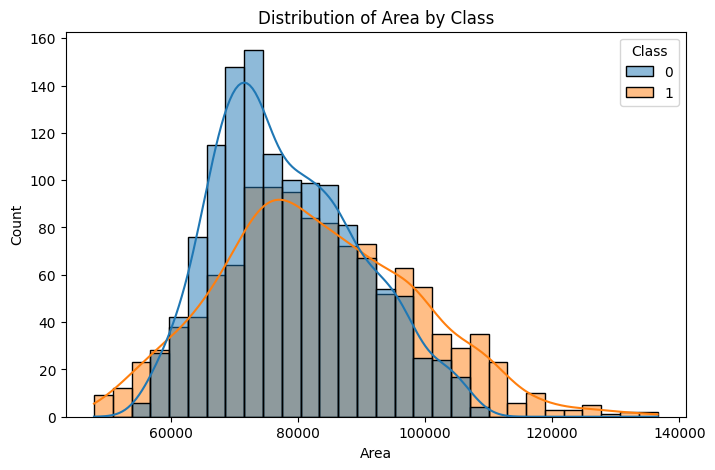

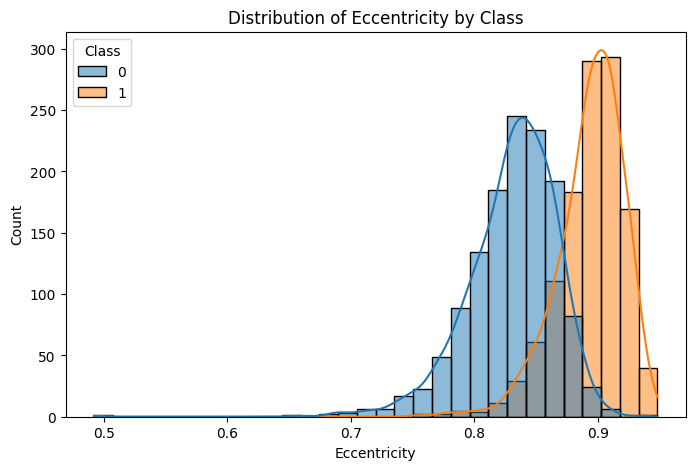

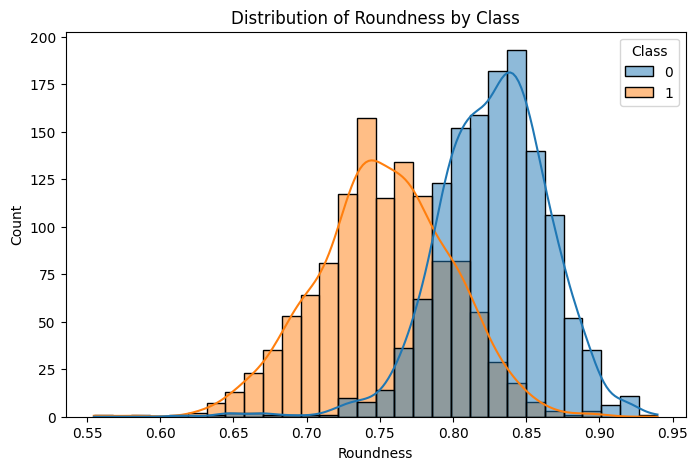

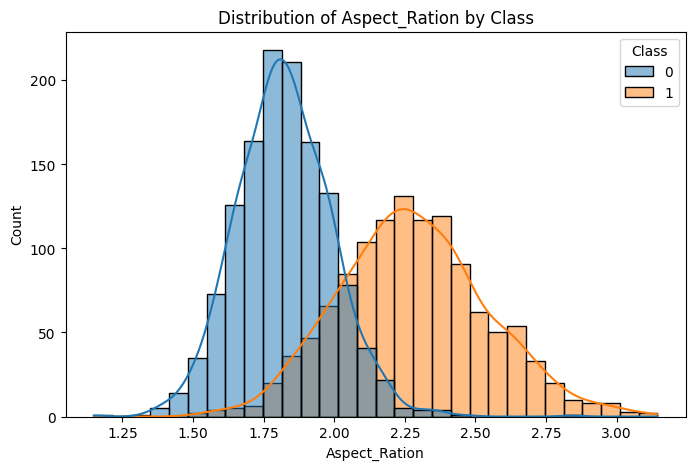

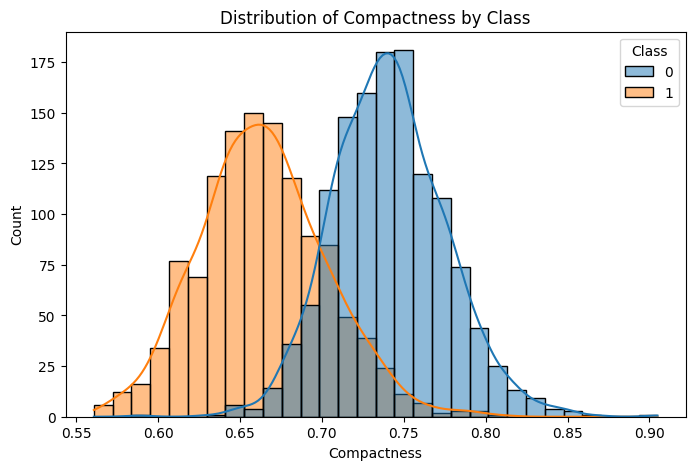

In [37]:
features = ['Area', 'Eccentricity', 'Roundness', 'Aspect_Ration', 'Compactness']
classes = data['Class']

# Visualize Feature Distributions
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x=feature, hue='Class', kde=True, bins=30)
    plt.title(f'Distribution of {feature} by Class')
    plt.show()

Based on the graphs above, each of the features shows varying degrees of separation between Class 0 (Cercevelik) and Class 1 (Urgup Sivrisi). Aspect Ratio, Roundness, and Eccentricity provide particularly clear distinctions, suggesting that these shape-related features are strong indicators for classifying the seeds. Compactness and Area also contribute to the separability but with a bit more overlap.

More specifically:

- <b> Area Distribution </b> <br>
Class 0 (Cercevelik) seeds generally have a lower area compared to Class 1 (Urgup Sivrisi) seeds, as indicated by the peak of the blue distribution on the left side of the plot.
There is some overlap between the two classes, but Class 1 (Urgup Sivrisi) seeds have a wider range of areas and tend to have higher values overall.<br><br>
- <b> Eccentricity Distribution </b> <br>
Class 0 (Cercevelik) seeds have a slightly lower eccentricity on average compared to Class 1 (Urgup Sivrisi) seeds. This suggests that Class 1 (Urgup Sivrisi) seeds are more elongated, while Class 0 (Cercevelik) seeds are closer to circular shapes.
The two classes are relatively well-separated in terms of eccentricity, indicating that this feature is useful for distinguishing between them.<br><br>
- <b> Roundness Distribution </b> <br>
Class 0 (Cercevelik) seeds generally have higher roundness values than Class 1 (Urgup Sivrisi) seeds, which supports the idea that Class 0 (Cercevelik) seeds are more circular.
There is a noticeable distinction between the two classes, with limited overlap. This suggests that roundness is a good feature for class differentiation.<br><br>
- <b> Aspect Ratio Distribution </b><br>
Class 0 (Cercevelik) seeds tend to have lower aspect ratios, indicating they are closer to being circular or evenly proportioned in length and width.
Class 1 (Urgup Sivrisi) seeds have higher aspect ratios, aligning with the description of them being more elongated.
This feature has a clear separation between classes, making it highly effective for distinguishing between Class 0 (Cercevelik) and Class 1 (Urgup Sivrisi).<br><br>
- <b> Compactness Distribution </b><br>
Class 0 (Cercevelik) seeds have a higher compactness than Class 1 (Urgup Sivrisi) seeds, indicating they are more similar in shape to a perfect circle with a given perimeter.
There is some overlap, but generally, the two classes show distinct peaks, suggesting that compactness can help in classification.

You can see how consistent the graphs are with the tables above as well. This gives us plausible key features to use in order to distinguish the two classes/seeds.

## 5c. Visual Comparison of Seeds via Drawing Measurements

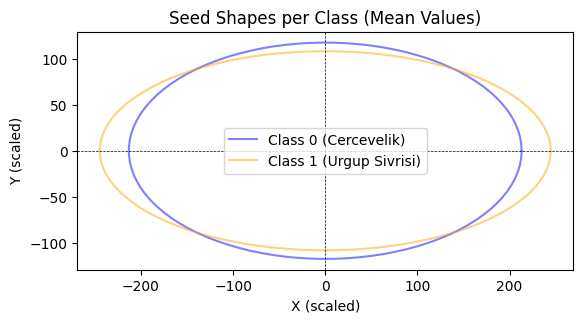

In [38]:
# Calculate the mean for each class
class0_major_axis = class0['Major_Axis_Length'].mean()
class0_minor_axis = class0['Minor_Axis_Length'].mean()

class1_major_axis = class1['Major_Axis_Length'].mean()
class1_minor_axis = class1['Minor_Axis_Length'].mean()

# Create the parametric points for the ovals
t = np.linspace(0, 2 * np.pi, 100)

# Oval for Class 0
x0 = (class0_major_axis / 2) * np.cos(t)
y0 = (class0_minor_axis / 2) * np.sin(t)
plt.plot(x0, y0, label='Class 0 (Cercevelik)', color='blue', alpha=0.5)

# Oval for Class 1
x1 = (class1_major_axis / 2) * np.cos(t)
y1 = (class1_minor_axis / 2) * np.sin(t)
plt.plot(x1, y1, label='Class 1 (Urgup Sivrisi)', color='orange', alpha=0.5)

# Add legends and labels
plt.title("Seed Shapes per Class (Mean Values)")
plt.xlabel("X (scaled)")
plt.ylabel("Y (scaled)")
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.gca().set_aspect('equal')  # Keep the aspect ratio equal
plt.legend()
plt.show()

## 5d. Correlation Analysis

In [39]:
df = pd.DataFrame(data)
numerical_columns = df.select_dtypes(include=['float64', 'int64', 'int32'])

correlation_matrix = numerical_columns.corr()
correlation_matrix

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
Area,1.000000,0.928548,0.789133,0.685304,0.999806,0.998464,0.159624,0.158388,-0.014018,-0.149378,0.159960,-0.160438,0.170280
Perimeter,0.928548,1.000000,0.946181,0.392913,0.929971,0.928055,0.464601,0.065340,-0.140600,-0.500968,0.487880,-0.484440,0.388345
Major_Axis_Length,0.789133,0.946181,1.000000,0.099376,0.789061,0.787078,0.704287,0.119291,-0.214990,-0.684972,0.729156,-0.726958,0.561458
Minor_Axis_Length,0.685304,0.392913,0.099376,1.000000,0.685634,0.690020,-0.590877,0.090915,0.233576,0.558566,-0.598475,0.603441,-0.401362
Convex_Area,0.999806,0.929971,0.789061,0.685634,1.000000,0.998289,0.159156,0.139178,-0.015449,-0.153615,0.159822,-0.160432,0.168029
Equiv_Diameter,0.998464,0.928055,0.787078,0.690020,0.998289,1.000000,0.156246,0.159454,-0.010970,-0.145313,0.155762,-0.156411,0.160303
Eccentricity,0.159624,0.464601,0.704287,-0.590877,0.159156,0.156246,1.000000,0.043991,-0.327316,-0.890651,0.950225,-0.981689,0.699319
Solidity,0.158388,0.065340,0.119291,0.090915,0.139178,0.159454,0.043991,1.000000,0.067537,0.200836,0.026410,-0.019967,0.122674
Extent,-0.014018,-0.140600,-0.214990,0.233576,-0.015449,-0.010970,-0.327316,0.067537,1.000000,0.352338,-0.329933,0.336984,-0.236076
Roundness,-0.149378,-0.500968,-0.684972,0.558566,-0.153615,-0.145313,-0.890651,0.200836,0.352338,1.000000,-0.935233,0.933308,-0.669514


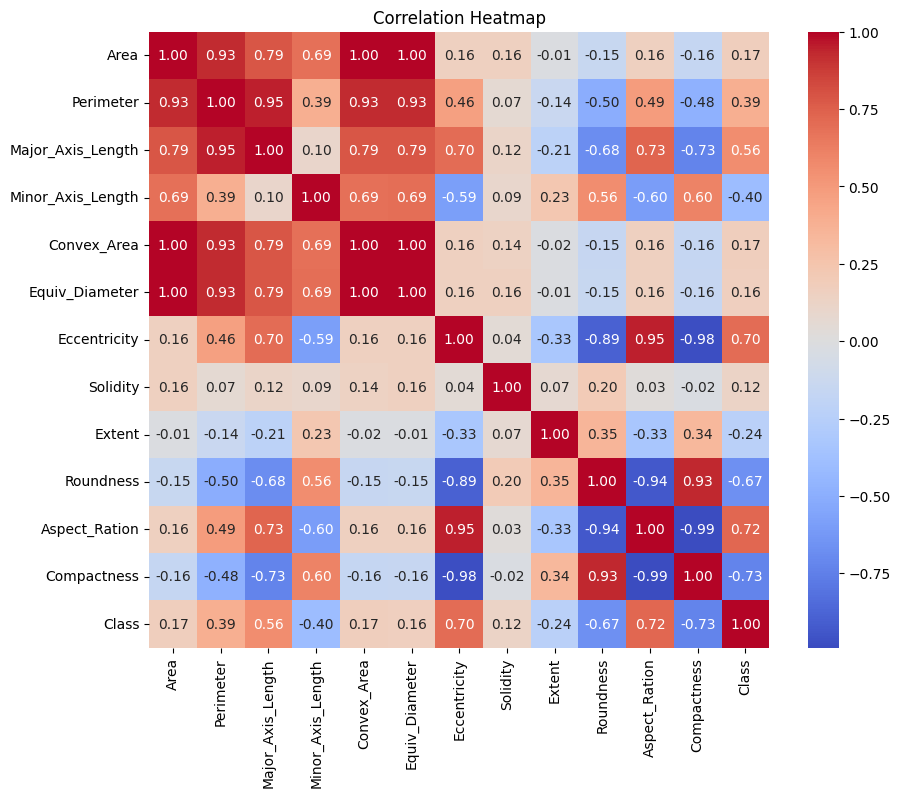

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

`Area`, `Convex_Area`, and `Equiv_Diameter` are highly correlated with each other (correlation close to 1). This is expected since these features are directly related to the size of the seed. Because they capture very similar information, including all these features in a model might lead to redundancy. Hence, it may be sufficient to keep just one of these in a model.

`Perimeter` has a strong correlation with `Major_Axis_Length` (correlation of 0.95), suggesting that larger perimeter values are associated with greater major axis lengths. This also indicates some redundancy, as these features may be measuring similar aspects of seed size and shape.

The Shape-related features show strong correlations with each other:
- `Eccentricity` and `Aspect_Ration` have a high positive correlation (0.95), meaning as eccentricity increases, so does the aspect ratio, which aligns with elongated shapes.
- `Eccentricity` and `Compactness` have a strong negative correlation (-0.98), indicating that more eccentric shapes (more elongated) have lower compactness.
- `Roundness` is also strongly correlated with `Aspect_Ration` (-0.94) and `Compactness` (0.93), showing that rounder seeds have a lower aspect ratio and higher compactness.

Given the high correlations among `Eccentricity`, `Aspect_Ration`, and `Compactness`, it may be another thing to consider by just choosing one or two of these to avoid redundancy.


`Solidity` and `Extent` have generally low correlations with other features, meaning they may capture unique aspects of seed shape or compactness that are not covered by other features.

In addition, features such as the `Eccentricity` and `Aspect_Ration` show a strong positive correlation with the target class while `Roundness`, `Compactness` show a strong negative correlation. Moreover, `Major_Axis_Length` shows a moderate positive correlation while `Minor_Axis_Length` shows a moderate `negative correlation` meaning both have a noticeable impact but may require other features or interactions for better prediction.

## 5e. Pairwise Scatter Plots
Based on the Pairwise Scatter Plots below, the features `Eccentricity`, `Roundness`, and `Aspect_Ration` show strong separability between Class 0 (Cercevelik) and Class 1 (Urgup Sivrisi), making them effective for classification. `Compactness` and `Area` also contribute to separability but to a lesser extent. The combination of shape-related features (like `Eccentricity`, `Roundness`, and `Aspect_Ration`) appears to be especially valuable for distinguishing the two classes, suggesting that shape is a more defining factor for classification than size.

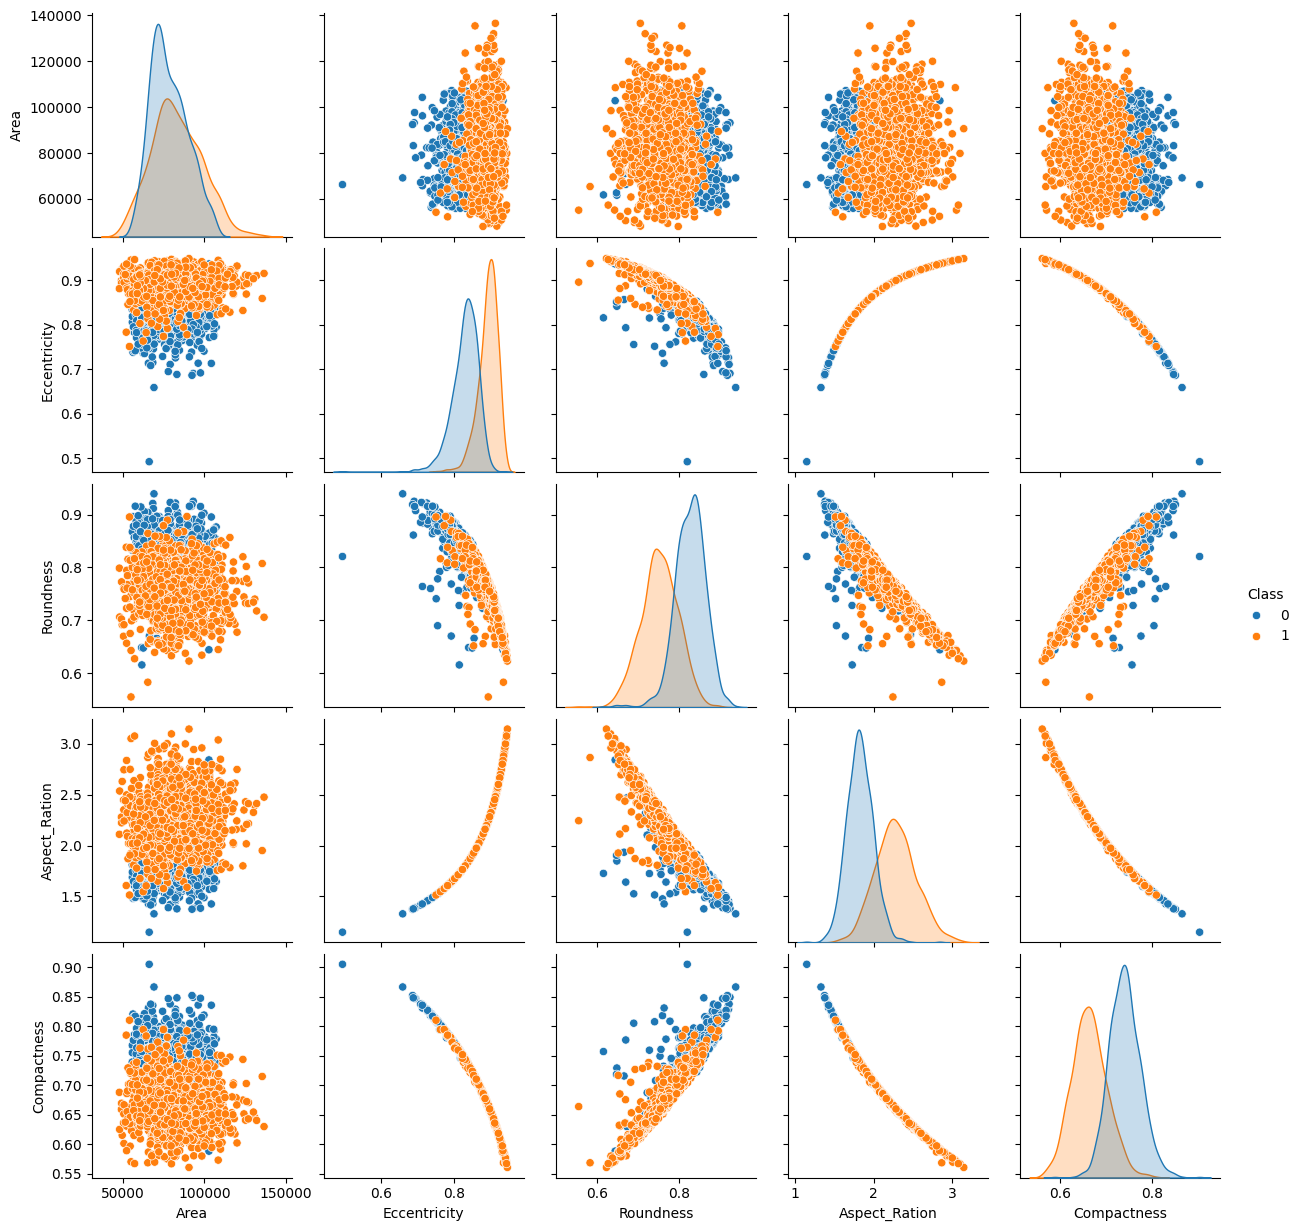

In [41]:
# Pairwise Scatter Plots
sns.pairplot(df[features + ['Class']], hue='Class', diag_kind='kde', height=2.5)
plt.show()

## 5f. Principal Component Analysis
The PCA (Principal Component Analysis) plot provides a two-dimensional representation of the data by reducing the features to two principal components (PCA1 and PCA2), which capture the most variance in the dataset.

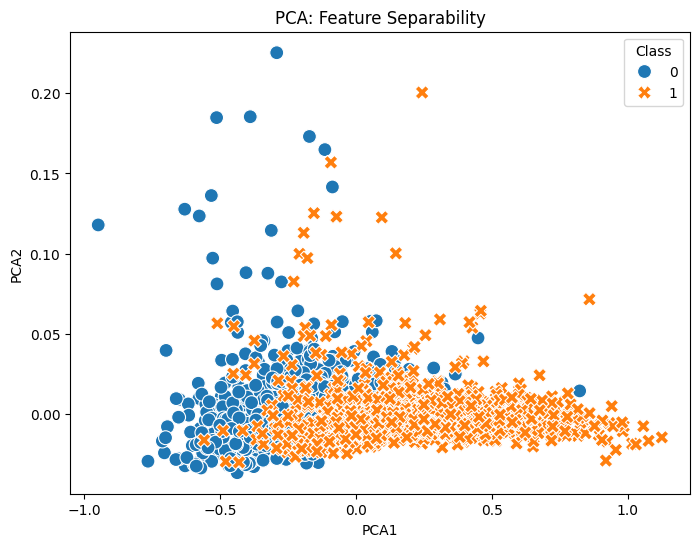

In [42]:
# Dimensionality Reduction
features = ['Eccentricity', 'Roundness', 'Aspect_Ration', 'Compactness']

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[features])
df['PCA1'], df['PCA2'] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Class', style='Class', s=100)
plt.title('PCA: Feature Separability')
plt.show()

In [44]:
components = pca.components_
feature_contributions = pd.DataFrame(components.T, index=features, columns=[
                                     f'PC{i+1}' for i in range(len(components))])

# Check absolute contributions of features to the first few principal components
print("Feature Contributions:")
print(feature_contributions)

feature_importance = feature_contributions.abs().sum(
    axis=1).sort_values(ascending=False)
print("\nFeature Importance (Summed Across PCs):")
print(feature_importance)

Feature Contributions:
                    PC1       PC2
Eccentricity   0.131458 -0.007248
Roundness     -0.160338 -0.985616
Aspect_Ration  0.964966 -0.166967
Compactness   -0.160783 -0.025124

Feature Importance (Summed Across PCs):
Roundness        1.145953
Aspect_Ration    1.131934
Compactness      0.185907
Eccentricity     0.138706
dtype: float64


`Eccentricity`, `Roundness`, `Aspect_Ration`, and `Compactness` are moderately effective at distinguishing Class 0 (Cercevelik) and Class 1 (Urgup Sivrisi), as seen by the general clustering of each class on opposite sides of PCA1. However, due to the overlap in the middle, these features alone may not perfectly separate the classes. Including additional features (such as `Area`) or exploring non-linear methods might further enhance separability.

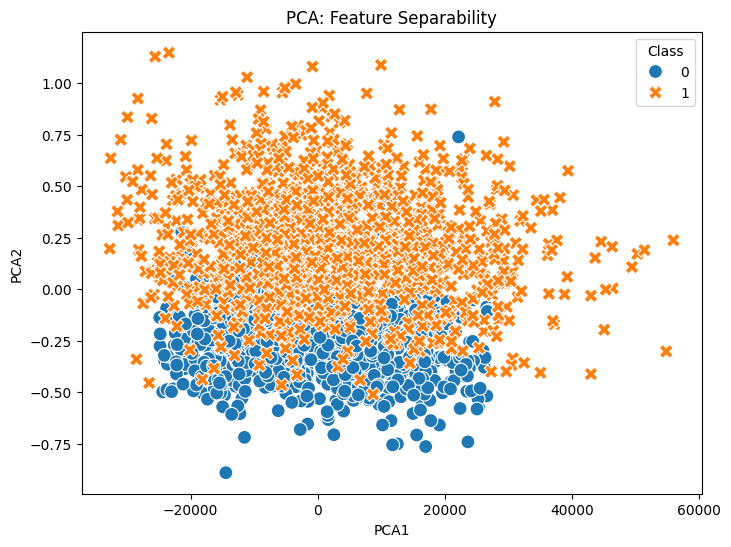

In [58]:
# Dimensionality Reduction
features = ['Area','Eccentricity', 'Roundness', 'Aspect_Ration', 'Compactness']

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[features])
df['PCA1'], df['PCA2'] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Class', style='Class', s=100)
plt.title('PCA: Feature Separability')
plt.show()

In [59]:
components = pca.components_
feature_contributions = pd.DataFrame(components.T, index=features, columns=[
                                     f'PC{i+1}' for i in range(len(components))])

# Check absolute contributions of features to the first few principal components
print("Feature Contributions:")
print(feature_contributions)

feature_importance = feature_contributions.abs().sum(
    axis=1).sort_values(ascending=False)
print("\nFeature Importance (Summed Across PCs):")
print(feature_importance)

Feature Contributions:
                        PC1       PC2
Area           1.000000e+00 -0.000004
Eccentricity   5.276291e-07  0.131299
Roundness     -6.113488e-07 -0.160364
Aspect_Ration  3.699135e-06  0.964990
Compactness   -6.230712e-07 -0.160740

Feature Importance (Summed Across PCs):
Area             1.000004
Aspect_Ration    0.964994
Compactness      0.160741
Roundness        0.160365
Eccentricity     0.131299
dtype: float64


Adding `Area` to the set of features (alongside `Eccentricity`, `Roundness`, `Aspect_Ration`, and `Compactness`) has improved the separability of the Class 0 (Cercevelik) and Class 1 (Urgup Sivrisi) classes in the PCA plot. This suggests that both size (represented by Area) and shape-related features are important for distinguishing these classes effectively. The improvement in separability implies that a classification model trained on this combination of features would likely perform better than one trained without Area.


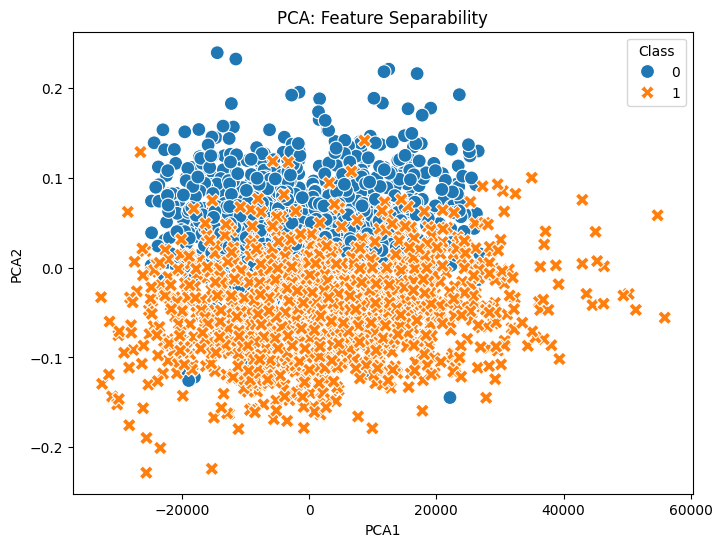

In [60]:
# Dimensionality Reduction
features = ['Area','Eccentricity', 'Roundness']

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[features])
df['PCA1'], df['PCA2'] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Class', style='Class', s=100)
plt.title('PCA: Feature Separability')
plt.show()

In [61]:
components = pca.components_
feature_contributions = pd.DataFrame(components.T, index=features, columns=[
                                     f'PC{i+1}' for i in range(len(components))])

# Check absolute contributions of features to the first few principal components
print("Feature Contributions:")
print(feature_contributions)

feature_importance = feature_contributions.abs().sum(
    axis=1).sort_values(ascending=False)
print("\nFeature Importance (Summed Across PCs):")
print(feature_importance)

Feature Contributions:
                       PC1           PC2
Area          1.000000e+00  8.066823e-07
Eccentricity  5.276291e-07 -6.175441e-01
Roundness    -6.113488e-07  7.865363e-01

Feature Importance (Summed Across PCs):
Area            1.000001
Roundness       0.786537
Eccentricity    0.617545
dtype: float64


`Area`, `Eccentricity`, and `Roundness` are effective at distinguishing Class 0 (Cercevelik) and Class 1 (Urgup Sivrisi), showing a clear seperation along PCA2. The removal of `Aspect_Ration` and `Compactness` provided a cleaner seperation of the two classes, and reduced the noise. This suggests that both size (represented by Area), and shape-related features are important for distinguishing these classes. However, there is still room for improvement as some overlap still exists.

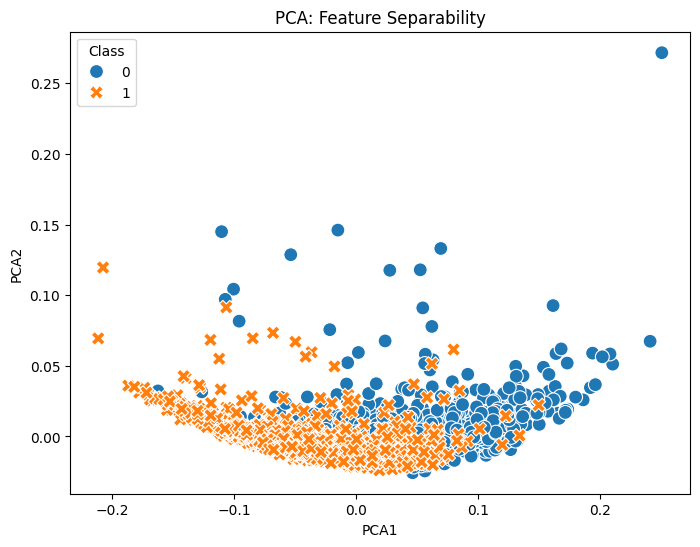

In [72]:
# Dimensionality Reduction
features = ['Eccentricity', 'Roundness']

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[features])
df['PCA1'], df['PCA2'] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Class', style='Class', s=100)
plt.title('PCA: Feature Separability')
plt.show()

In [71]:
components = pca.components_
feature_contributions = pd.DataFrame(components.T, index=features, columns=[
                                     f'PC{i+1}' for i in range(len(components))])

# Check absolute contributions of features to the first few principal components
print("Feature Contributions:")
print(feature_contributions)

feature_importance = feature_contributions.abs().sum(
    axis=1).sort_values(ascending=False)
print("\nFeature Importance (Summed Across PCs):")
print(feature_importance)

Feature Contributions:
                    PC1       PC2
Eccentricity   0.133054 -0.018822
Roundness     -0.162440 -0.986714
Aspect_Ration  0.977706 -0.161375

Feature Importance (Summed Across PCs):
Roundness        1.149154
Aspect_Ration    1.139082
Eccentricity     0.151875
dtype: float64


`Eccentricity` and `Roundness` are effective at distinguishing Class 0 (Cercevelik) and Class 1 (Urgup Sivrisi), showing clear separation along PCA2. The removal of `Area`, `Aspect_Ratio`, and `Compactness` simplified the feature set while maintaining meaningful class separation. This suggests that shape-related features, particularly Eccentricity and Roundness, play a key role in distinguishing these classes.

# Section 6. Initial Model Training

In this section, we perform the initial model training to try to identify the underlying patterns in the dataset. **k-Nearest Neighbors (kNN), Logistic Regression, and Naive Bayes** are the three models chosen to perform the classification task of identifying the type of pumpkin seed.

### Feature Selection

Based on the Exploratory Data Analysis findings, features such as Eccentricity, Aspect_Ration, Roundness, and Compactness have a strong correlation to the target class so these are highly predictive of the target class and can be used as features when fed to the model. In addition, features with moderate correlation with the target class such as the Major_Axis_Length and the Minor_Axis_Length may also be used since both may help predict the target class when combined with the features with strong correlation. Lastly, based on the PCA output, Area can also be added as it has improved the separability of the target class when combined with Eccentricity, Aspect_Ration, Roundness, and Compactness.

In [18]:
# Feature and Target Selection
features = df[['Eccentricity', 'Aspect_Ration', 'Roundness', 'Compactness', 'Major_Axis_Length',  'Minor_Axis_Length', 'Area']]
target = df['Class']

### Splitting of Training and Testing Data

In [19]:
X = features
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

### k-Nearest Neighbors (kNN) Model Training

K-Nearest Neighbors(KNN) is a simple machine learning model with realitvely high interpretability. The model, makes no prior assumptions about the data distribution and its outputs are easily explainable to stakeholders. KNN's predictions are made based on the class majority of the closest neighbors. The closest neighbors is a hyperparameter `n_neighbors`, which by default is set to three. Having a smaller number of neighbores makes the model less sensitive to noise, while having a higher value gives a clearer decision boundary.  


To measure the distance between the datapoints, KNN uses the `Eucledian distance` by default. Other distance metrics could be used such as but not limited to the `Minowski distance`, `Manhattan distance`, and the `Jaccard distance`. The `Eucledian distance` will be used in this model, since the scaled data can have negative values, making the `Minowski distance` unusable. 


The default weight setting of the model is `uniform` making all neighbors contribute equally to the prediction. 


To tune this model we need to find the best value for `n_neighbors`. The best way to do this is by using the elbow method.


In [21]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)

model_knn_scaled = KNeighborsClassifier(n_neighbors=3)
model_knn_scaled.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

### Logistic Regression Model Training

The logistic regression model is designed for binary classification tasks. This model predicts the probability for the target class using a `sigmoid function`. This model assumes that there is a linear relationship between the features and the log-probability of the target classes. The `regularization rate` is a hyperparameter which is used to mitigate overfitting. By default, the `L2` regularization is applied, which penalizes inputs with large coefficients. This helps keep the model more generalized.

To control the regularization, another hyperparameter `c` handles the penalty for regularization. By default, this value is set to `1.0`. Increasing this value results to a more flexible model, while decreasing this value makes the model more stiff.


Optimizing the loss function for Logistic regession involves the use of solvers. {Add kemeru here}


The solvers implicitly contros the optimization steps for this model. 


In [22]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

model_lr_scaled = LogisticRegression()
model_lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

### Neural Networks Model Training

Neural Networks is a highly flexible model which can capture complex and non-linear relationships between the data. It performs well on datasets with large number of features or high-dimensionality. 
The output layer for this can be set into `Sigmoid` which is the same function used in `Logistic Regression`

The number of hidden layers and neurons of the network is one of this model's hyperparameters. The number of hidden layers and neurons depends on the complexity of the data and the patterns it needs to capture.

Another important hyperparameter is the activation function used in the hidden layers. The `ReLU` (Rectified Linear Unit) activation function is commonly chosen for hidden layers due to its efficiency and ability to introduce non-linearity into the model, allowing it to capture complex patterns. The Sigmoid activation function, used in the output layer, is ideal for binary classification as it outputs a probability score between 0 and 1, making it easy to threshold for binary decisions.

The optimizer used to train the neural network is another critical hyperparameter. For this task, the Adam optimizer is chosen, which combines the advantages of both RMSprop and Stochastic Gradient Descent (SGD). It adapts the learning rate dynamically during training, ensuring faster and more stable convergence. The initial learning rate is set to 0.001, which is a common default that provides a balance between convergence speed and stability.


To prevent overfitting, regularization is applied using an L2 penalty (weight decay) with a strength parameter (alpha) of 0.0001. This ensures that the model does not assign excessive importance to any single feature, helping to generalize better to unseen data. Additionally, early stopping can be used during training to halt the process when the model’s performance on a validation set stops improving, avoiding unnecessary epochs and overfitting.

The batch size controls the number of samples processed before updating the model parameters. A batch size of 32 is commonly used as it provides a good balance between memory efficiency and convergence speed. Finally, the model is trained for a maximum of 100 epochs, although early stopping can terminate the training earlier if the validation loss plateaus.



In [23]:
model_nn = MLPClassifier(
    hidden_layer_sizes=(8, ),
    activation='relu',
    alpha=0.0001,
    learning_rate_init=0.001,
    max_iter=100,
    random_state=42)
model_nn.fit(X_train, y_train)

model_nn_scaled = MLPClassifier(
    hidden_layer_sizes=(8, ),
    activation='relu',
    alpha=0.0001,
    learning_rate_init=0.001,
    max_iter=100,
    random_state=42)
model_nn_scaled.fit(X_train_scaled, y_train)

c:\Users\janam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8,), max_iter=100, random_state=42)

## Section 7. Error Analysis

KNN Model (Unscaled - Training Set)
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1049
           1       0.90      0.87      0.88       951

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



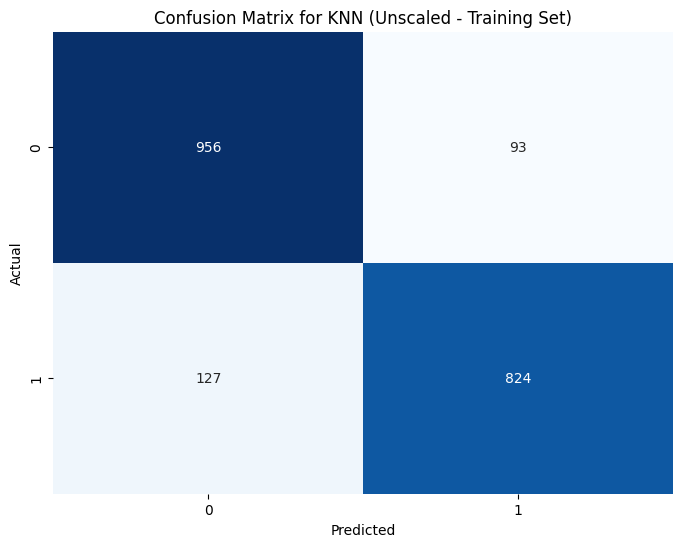

KNN Model (Unscaled - Test Set)
              precision    recall  f1-score   support

           0       0.66      0.73      0.69       251
           1       0.69      0.62      0.65       249

    accuracy                           0.67       500
   macro avg       0.68      0.67      0.67       500
weighted avg       0.68      0.67      0.67       500



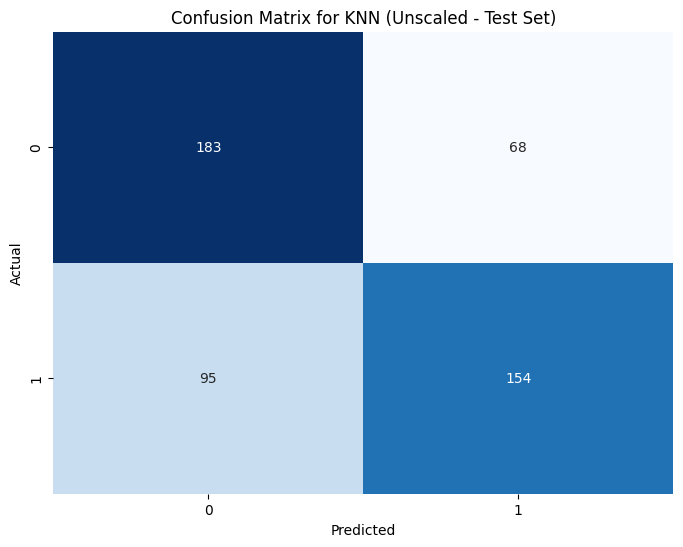

In [24]:
# KNN Evaluation (Unscaled)
# Training Set
y_pred_knn_train = model_knn.predict(X_train)
print('KNN Model (Unscaled - Training Set)')
print(classification_report(y_train, y_pred_knn_train))

cm_knn_train = confusion_matrix(y_train, y_pred_knn_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_train, annot=True, fmt='d', cmap='Blues', xticklabels={0,1}, yticklabels={0,1}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN (Unscaled - Training Set)')
plt.show()

# Test Set
y_pred_knn = model_knn.predict(X_test)
print('KNN Model (Unscaled - Test Set)')
print(classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels={0,1}, yticklabels={0,1}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN (Unscaled - Test Set)')
plt.show()

KNN Model (Scaled - Training Set)
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1049
           1       0.93      0.89      0.91       951

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



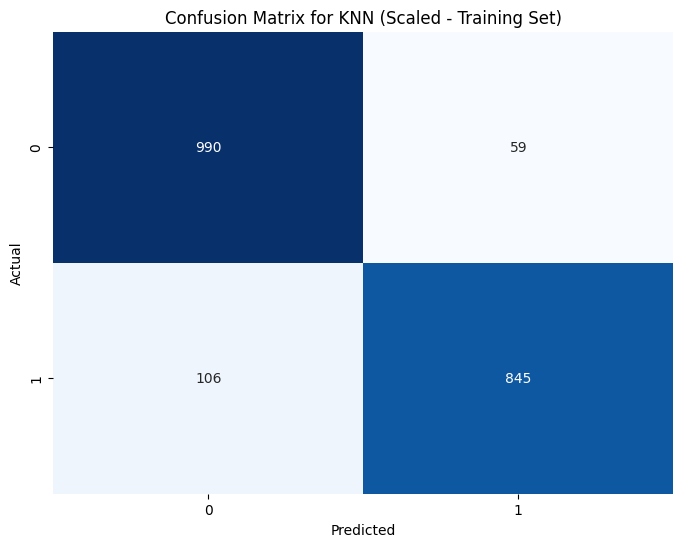

KNN Model (Scaled - Test Set)
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       251
           1       0.87      0.83      0.85       249

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



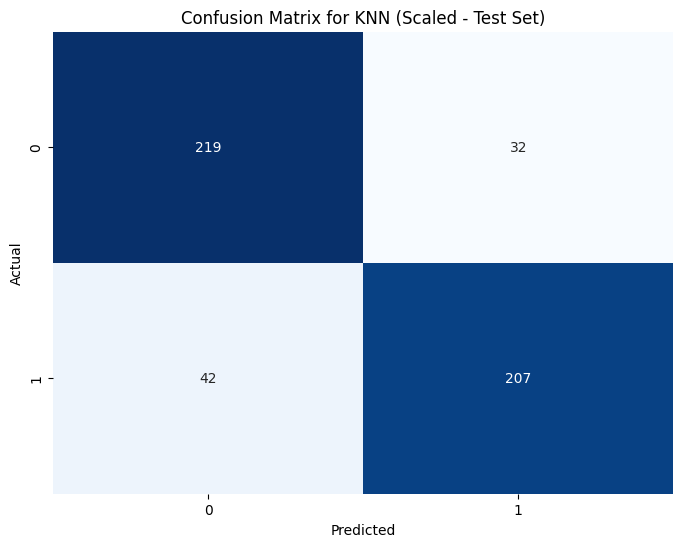

In [25]:
# KNN Evaluation (Scaled)
# Training Set
y_pred_knn_scaled_train = model_knn_scaled.predict(X_train_scaled)
print('KNN Model (Scaled - Training Set)')
print(classification_report(y_train, y_pred_knn_scaled_train))

cm_knn_scaled_train = confusion_matrix(y_train, y_pred_knn_scaled_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_scaled_train, annot=True, fmt='d', cmap='Blues', xticklabels={0,1}, yticklabels={0,1}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN (Scaled - Training Set)')
plt.show()

# Test Set
y_pred_knn_scaled = model_knn_scaled.predict(X_test_scaled)
print('KNN Model (Scaled - Test Set)')
print(classification_report(y_test, y_pred_knn_scaled))

cm_knn_scaled = confusion_matrix(y_test, y_pred_knn_scaled)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_scaled, annot=True, fmt='d', cmap='Blues', xticklabels={0,1}, yticklabels={0,1}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN (Scaled - Test Set)')
plt.show()

Logistic Regression Model (Unscaled - Training Set)
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1049
           1       0.89      0.85      0.87       951

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



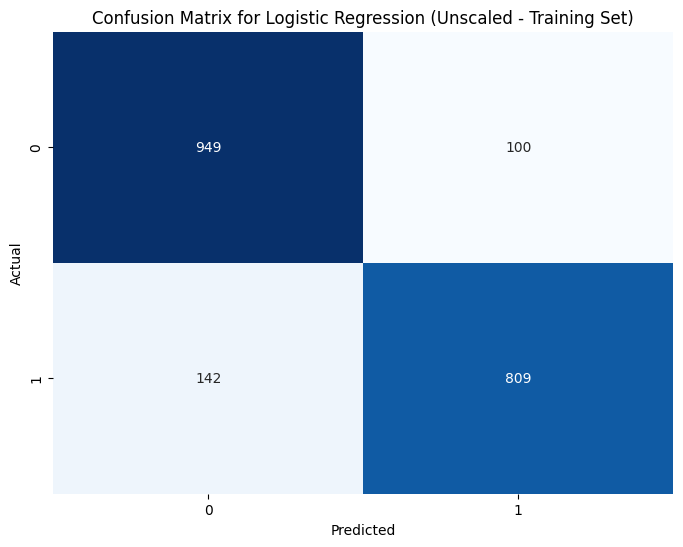

Logistic Regression Model (Unscaled - Test Set)
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       251
           1       0.84      0.80      0.82       249

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



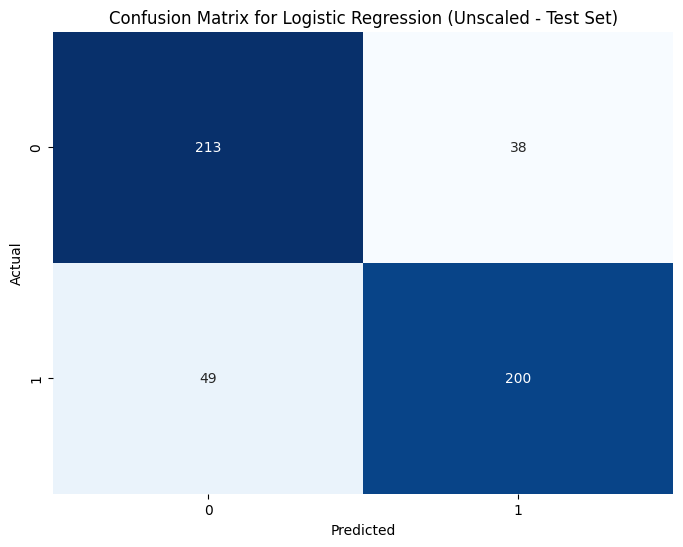

In [26]:
# Logistic Regression Evaluation (Unscaled)
# Training Set
y_pred_lr_train = model_lr.predict(X_train)
print('Logistic Regression Model (Unscaled - Training Set)')
print(classification_report(y_train, y_pred_lr_train))

cm_lr_train = confusion_matrix(y_train, y_pred_lr_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr_train, annot=True, fmt='d', cmap='Blues', xticklabels={0,1}, yticklabels={0,1}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression (Unscaled - Training Set)')
plt.show()

# Test Set
y_pred_lr = model_lr.predict(X_test)
print('Logistic Regression Model (Unscaled - Test Set)')
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels={0,1}, yticklabels={0,1}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression (Unscaled - Test Set)')
plt.show()

Logistic Regression Model (Scaled - Training Set)
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1049
           1       0.89      0.85      0.87       951

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



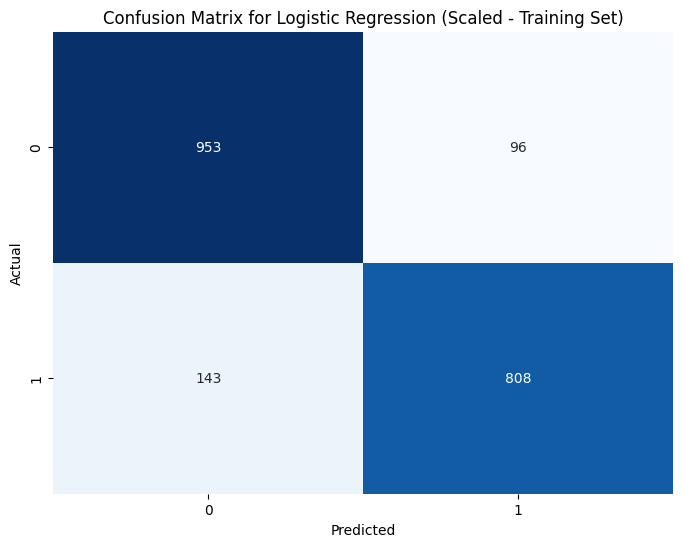

Logistic Regression Model (Scaled - Test Set)
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       251
           1       0.86      0.81      0.83       249

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



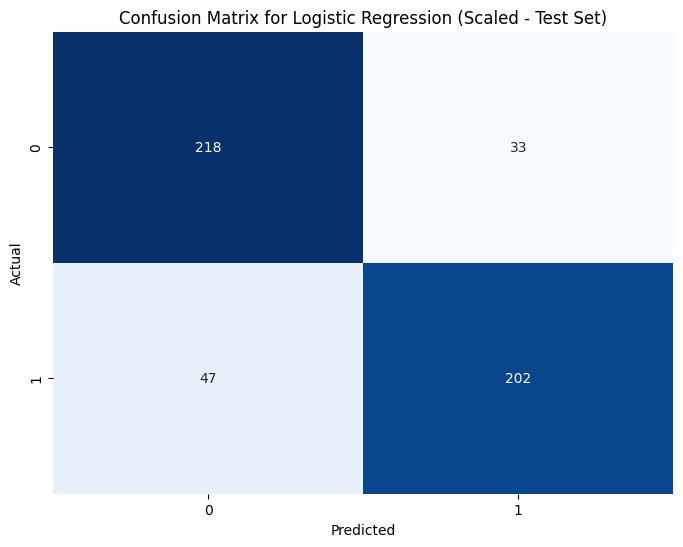

In [27]:
# Logistic Regression Evaluation (Scaled)
# Training Set
y_pred_lr_scaled_train = model_lr_scaled.predict(X_train_scaled)
print('Logistic Regression Model (Scaled - Training Set)')
print(classification_report(y_train, y_pred_lr_scaled_train))

cm_lr_scaled_train = confusion_matrix(y_train, y_pred_lr_scaled_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr_scaled_train, annot=True, fmt='d', cmap='Blues', xticklabels={0,1}, yticklabels={0,1}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression (Scaled - Training Set)')
plt.show()

# Test Set
y_pred_lr_scaled = model_lr_scaled.predict(X_test_scaled)
print('Logistic Regression Model (Scaled - Test Set)')
print(classification_report(y_test, y_pred_lr_scaled))

cm_lr_scaled = confusion_matrix(y_test, y_pred_lr_scaled)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr_scaled, annot=True, fmt='d', cmap='Blues', xticklabels={0,1}, yticklabels={0,1}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression (Scaled - Test Set)')
plt.show()


Neural Network Model (Unscaled - Training Set)
              precision    recall  f1-score   support

           0       0.48      0.80      0.60      1049
           1       0.23      0.07      0.10       951

    accuracy                           0.45      2000
   macro avg       0.36      0.43      0.35      2000
weighted avg       0.36      0.45      0.36      2000



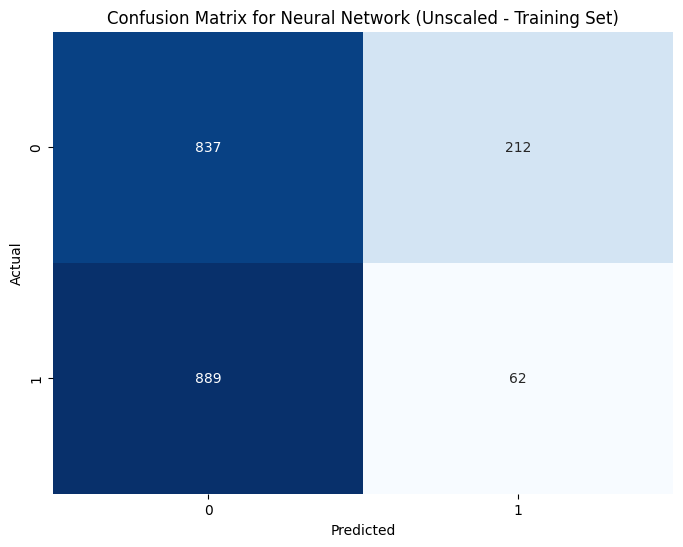

Neural Network Model (Unscaled - Test Set)
              precision    recall  f1-score   support

           0       0.48      0.85      0.61       251
           1       0.26      0.05      0.09       249

    accuracy                           0.45       500
   macro avg       0.37      0.45      0.35       500
weighted avg       0.37      0.45      0.35       500



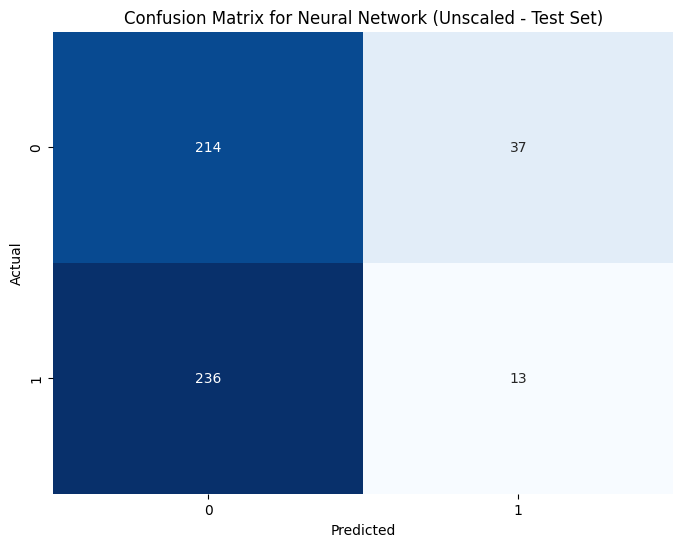

In [28]:
# Neural Network Evaluation (Unscaled)
# Training Set
y_pred_nn_train = model_nn.predict(X_train)
print('Neural Network Model (Unscaled - Training Set)')
print(classification_report(y_train, y_pred_nn_train, zero_division=0))

cm_nn_train = confusion_matrix(y_train, y_pred_nn_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn_train, annot=True, fmt='d', cmap='Blues', xticklabels={0,1}, yticklabels={0,1}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Neural Network (Unscaled - Training Set)')
plt.show()

# Test Set
y_pred_nn = model_nn.predict(X_test)
print('Neural Network Model (Unscaled - Test Set)')
print(classification_report(y_test, y_pred_nn, zero_division=0))

cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels={0,1}, yticklabels={0,1}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Neural Network (Unscaled - Test Set)')
plt.show()


Neural Network Model (Scaled - Training Set)
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1049
           1       0.89      0.85      0.87       951

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



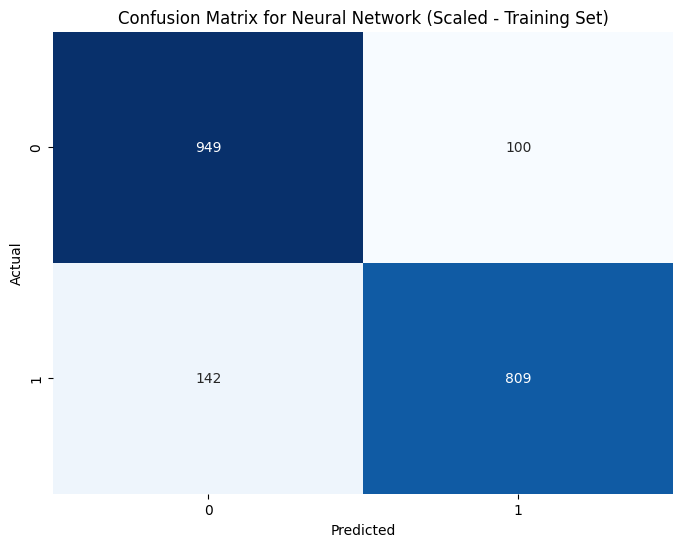

Neural Network Model (Scaled - Test Set)
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       251
           1       0.85      0.80      0.82       249

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



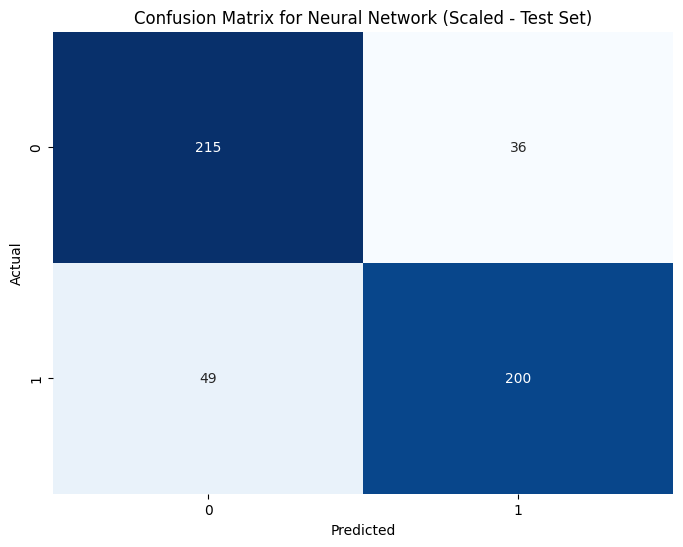

In [29]:
# Neural Network Evaluation (Scaled)
# Training Set
y_pred_nn_scaled_train = model_nn_scaled.predict(X_train_scaled)
print('Neural Network Model (Scaled - Training Set)')
print(classification_report(y_train, y_pred_nn_scaled_train, zero_division=0))

cm_nn_scaled_train = confusion_matrix(y_train, y_pred_nn_scaled_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn_scaled_train, annot=True, fmt='d', cmap='Blues', xticklabels={0,1}, yticklabels={0,1}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Neural Network (Scaled - Training Set)')
plt.show()

# Test Set
y_pred_nn_scaled = model_nn_scaled.predict(X_test_scaled)
print('Neural Network Model (Scaled - Test Set)')
print(classification_report(y_test, y_pred_nn_scaled, zero_division=0))

cm_nn_scaled = confusion_matrix(y_test, y_pred_nn_scaled)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn_scaled, annot=True, fmt='d', cmap='Blues', xticklabels={0,1}, yticklabels={0,1}, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Neural Network (Scaled - Test Set)')
plt.show()

In [30]:
# Accuracy Scores for Training and Test Sets

# k-Nearest Neighbors (kNN)
knn_train_acc = accuracy_score(y_train, y_pred_knn_scaled_train)
knn_test_acc = accuracy_score(y_test, y_pred_knn_scaled)
print(f"kNN Training Accuracy: {knn_train_acc * 100:.2f}%")
print(f"kNN Test Accuracy: {knn_test_acc * 100:.2f}%")

# Logistic Regression
lr_train_acc = accuracy_score(y_train, y_pred_lr_scaled_train)
lr_test_acc = accuracy_score(y_test, y_pred_lr_scaled)
print(f"Logistic Regression Training Accuracy: {lr_train_acc * 100:.2f}%")
print(f"Logistic Regression Test Accuracy: {lr_test_acc * 100:.2f}%")

# Neural Network
nn_train_acc = accuracy_score(y_train, y_pred_nn_scaled_train)
nn_test_acc = accuracy_score(y_test, y_pred_nn_scaled)
print(f"Neural Network Training Accuracy: {nn_train_acc * 100:.2f}%")
print(f"Neural Network Test Accuracy: {nn_test_acc * 100:.2f}%")


kNN Training Accuracy: 91.75%
kNN Test Accuracy: 85.20%
Logistic Regression Training Accuracy: 88.05%
Logistic Regression Test Accuracy: 84.00%
Neural Network Training Accuracy: 87.90%
Neural Network Test Accuracy: 83.00%


## Section 8. Improving model performance

## Section 9. Model performance summary

## Section 10. Insights and conclusions


## Section 11. References